# Tarea 3

Jairo Saul Diaz Soto

Dr. Joaquin Peña Acevedo

Optimizacion I

2024 / 02 / 18

---
## Ejercicio 1

### 1.- Backtracking y condicion de Armijo

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def bt_armijo(a0, rho, c0, x0, f_func, grad_fun, p0, NMax):
    a = a0
    for k in range(NMax):
        if f_func(x0 + (a*p0)) <= f_func(x0) + (c0*a*(grad_fun(x0)@p0)):
            return a, k
        a *= rho
    return a, k

    

### 2.- Descenso con backtracking

In [41]:
def descmax_bt(f_fun, grad_fun, x0, tau, NMax, a0, rho, c0, KMax):
    record = list()
    for k in range(NMax):
        g = grad_fun(x0)
        p = -g
        a, i = bt_armijo(a0, rho, c0, x0, f_fun, grad_fun, p, KMax)
        if len(x0) == 2:
            record.append([x0[0], x0[1], a, i])
        if a * np.linalg.norm(p) < tau:
            return x0, k, True, np.array(record)
        x0 += a*p
    return x0, k, False, np.array(record)

### 3.- Probando el algoritmo

In [42]:
def himmelblau(x):
    return ((x[0]**2) + x[1] - 11)**2 + (x[0] + (x[1]**2) - 7)**2

def himmelblau_grad(x):
    return np.array([(4*x[0]*((x[0]**2) + x[1] - 11)) + (2*(x[0] + (x[1]**2) - 7)),
                     (2*((x[0]**2) + x[1] - 11)) + (4*x[1]*(x[0] + (x[1]**2) - 7))])

def bale(x):
    return (1.5 - x[0] + (x[0]*x[1]))**2 + (2.25 - x[0] + (x[0]*x[1]**2))**2 + (2.625 - x[0] + (x[0]*x[1]**3))**2
    
def bale_grad(x):
    return np.array([ (2*(x[1] - 1) * (1.5 - x[0] + (x[0]*x[1]))) + (2*(x[1]**2 - 1)*(2.25 - x[0] + (x[0]*x[1]**2))) + (2*(x[1]**3 - 1)*(2.625 - x[0] + (x[0]*x[1]**3))), 
                    (2*x[0]*(1.5 - x[0] + (x[0]*x[1]))) + (4*(x[0]*x[1])*(2.25 - x[0] + (x[0]*x[1]**2))) + (6*(x[0]*x[1]**2)*(2.625 - x[0] + (x[0]*x[1]**3)))])

def rosenbrock(x):
    n = len(x)
    res = 0
    for k in range(n-1):
        res += (100 * (x[k+1] - (x[k]**2))**2 ) + (1-x[k])**2
    return res

def rosenbrock_grad(x):
    gradient = np.zeros_like(x)
    n = len(x)
    for i in range(n-1):
        gradient[i] += (-400*x[i]*(x[i+1] - (x[i]**2))) - (2*(1-x[i]))
        gradient[i+1] += (200)*(x[i+1] - (x[i]**2))
    return gradient

In [43]:
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, puntos=None):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i, j] = fncf(np.array([x, y]))
    
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='Wistia')
    
    # Grafica los puntos y conecta la secuencia con líneas
    if puntos is not None:
        puntos = np.array(puntos)
        ax.plot(puntos[:, 0], puntos[:, 1], color='red', marker='o', linestyle='-', linewidth=2, label='Secuencia de puntos')
    
    ax.legend()  # Muestra la leyenda si se han graficado puntos
    plt.show()

In [44]:
eps_m = np.finfo(float).eps

---
Funcion de Himmelblau

In [45]:
ffun = himmelblau
gfun = himmelblau_grad
xsearch = [-5,5]
ysearch = [-5,5]
x0 = np.array([2.0, 4.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600

In [46]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  29
El punto optimo hallado fue:  [2.99999999 1.99999999]
El valor de la funcion en el punto optimo hallado es:  7.84550082956209e-15
La norma del gradiente en el punto optimo hallado es de 1.1100948506376434e-06
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.018802528444271847
El promedio de iteraciones del algoritmo de backtracking fue de:  17.833333333333332


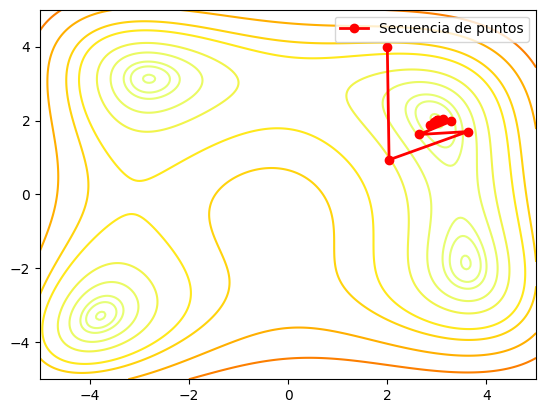

In [47]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

In [48]:
ffun = himmelblau
gfun = himmelblau_grad
xsearch = [-5,5]
ysearch = [-5,5]
x0 = np.array([0.0, 0.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600

In [49]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  32
El punto optimo hallado fue:  [2.99999999 1.99999999]
El valor de la funcion en el punto optimo hallado es:  7.151770384664323e-15
La norma del gradiente en el punto optimo hallado es de 1.0439488209969912e-06
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.023569234228101043
El promedio de iteraciones del algoritmo de backtracking fue de:  17.484848484848484


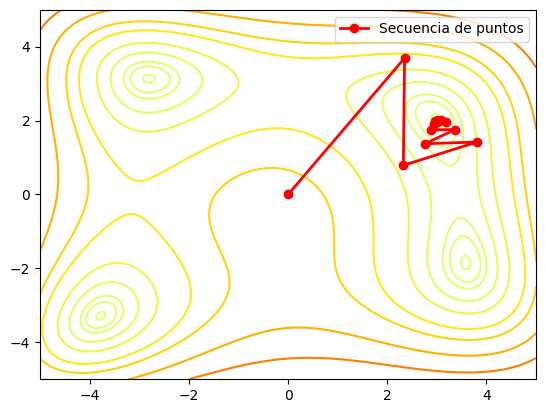

In [50]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

---
Funcion de Beale

In [51]:
ffun = bale
gfun = bale_grad
xsearch = [-4.5,4.5]
ysearch = [-4.5,4.5]
x0 = np.array([2.0, 3.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600

In [52]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  1011
El punto optimo hallado fue:  [2.99999928 0.49999983]
El valor de la funcion en el punto optimo hallado es:  8.528428776110023e-14
La norma del gradiente en el punto optimo hallado es de 4.667207212327143e-07
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.04282866564722104
El promedio de iteraciones del algoritmo de backtracking fue de:  14.193675889328063


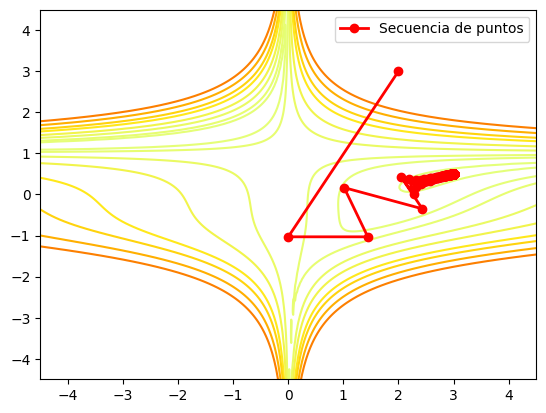

In [53]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

In [54]:
ffun = bale
gfun = bale_grad
xsearch = [-4.5,8]
ysearch = [-4.5,4.5]
x0 = np.array([2.0, 4.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600

In [55]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  16864
El punto optimo hallado fue:  [3.00000074 0.50000019]
El valor de la funcion en el punto optimo hallado es:  8.885549089950447e-14
La norma del gradiente en el punto optimo hallado es de 4.7076080101774503e-07
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.006950835688126628
El promedio de iteraciones del algoritmo de backtracking fue de:  24.097005632967683


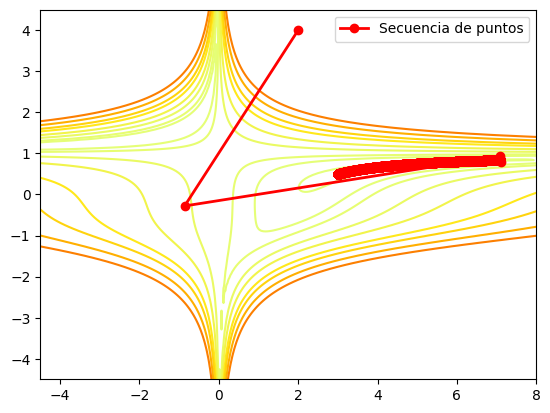

In [56]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

Funcion de Rosenbrock

In [57]:
ffun = rosenbrock
gfun = rosenbrock_grad
xsearch = [-3,3]
ysearch = [-1,5]
x0 = np.array([-2.1, 4.5])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600

In [58]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  21730
El punto optimo hallado fue:  [1.000006   1.00001204]
El valor de la funcion en el punto optimo hallado es:  3.61526542723387e-11
La norma del gradiente en el punto optimo hallado es de 1.0852939980899932e-05
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.0016287744602422186
El promedio de iteraciones del algoritmo de backtracking fue de:  29.21494638994984


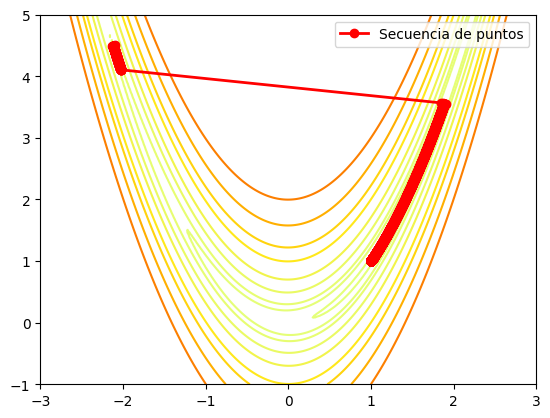

In [59]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

In [60]:
ffun = rosenbrock
gfun = rosenbrock_grad
xsearch = [-3,3]
ysearch = [-1,5]
x0 = np.array([-1.2, 1.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600

In [61]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  11166
El punto optimo hallado fue:  [1.00000613 1.00001231]
El valor de la funcion en el punto optimo hallado es:  3.7820775522341363e-11
La norma del gradiente en el punto optimo hallado es de 1.0886691640011656e-05
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.0020360078098377097
El promedio de iteraciones del algoritmo de backtracking fue de:  27.883316915912957


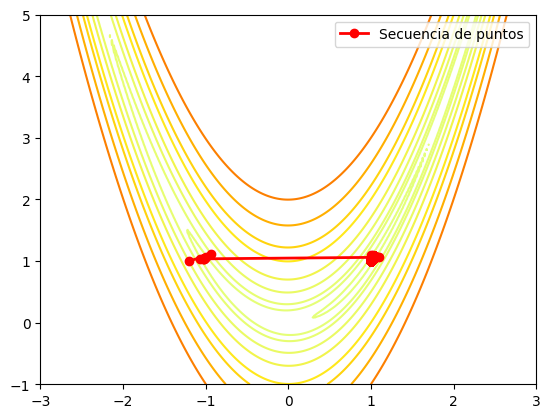

In [62]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

### 4.- Propuesta de Nocedal

In [63]:
ffun = bale
gfun = bale_grad
xsearch = [-4.5,4.5]
ysearch = [-4.5,4.5]
x0 = np.array([2.0, 3.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.0001
NMax = 30000
KMax = 600

In [64]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  29999
El punto optimo hallado fue:  [-0.00964943  6.72131827]
El valor de la funcion en el punto optimo hallado es:  5.500622340349483
La norma del gradiente en el punto optimo hallado es de 1.131711448244844
El algoritmo termino con condicion de paro:  False
El valor promedio de los pasos fue:  1.6435986478438556e-05
El promedio de iteraciones del algoritmo de backtracking fue de:  51.4287


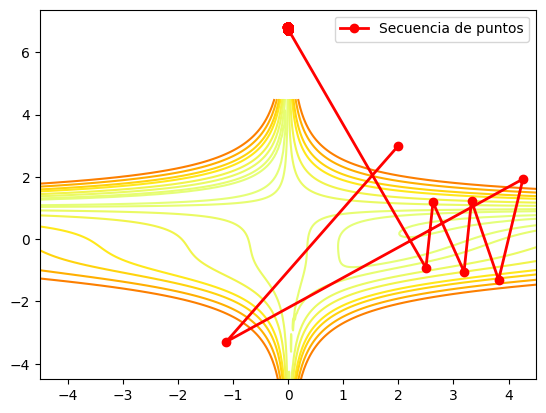

In [65]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

In [66]:
ffun = bale
gfun = bale_grad
xsearch = [-4.5,4.5]
ysearch = [-4.5,4.5]
x0 = np.array([2.0, 4.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.0001
NMax = 30000
KMax = 600

In [67]:
xk, kiter, bl, rcrd = descmax_bt(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)

El numero de iteraciones del algoritmo de descenso fue de:  10823
El punto optimo hallado fue:  [3.00000046 0.50000012]
El valor de la funcion en el punto optimo hallado es:  3.605743478619451e-14
La norma del gradiente en el punto optimo hallado es de 4.619172961344461e-07
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.009397115545220469
El promedio de iteraciones del algoritmo de backtracking fue de:  22.937453806356245


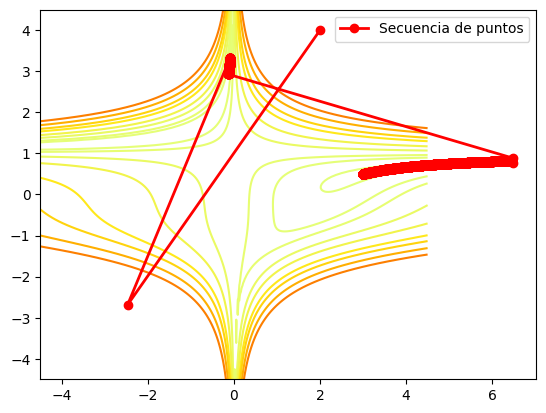

In [68]:
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

### Comentario
Bien en este caso, parece ser que en uno de los casos empeoro el resultado a tal punto de que no se pudo alcanzar la convergencia, aumentando tambien el promedio de iteraciones del algoritmo de backtracking casi 5 veces; sin embargo, para el segundo caso, es posible observar que el numero de iteraciones del algortimo de descenso decrecio de forma sustancial y, aunque no de manera notoria, tambien el promedio de las iteraciones del algoritmo de backtracking se vio favorecido.

La diferencia entre estos es el punto inicial, ya que la funcion de Beale evaluada en cada punto inicial cambia mientras que para el caso donde se empeoro el valor inicial es mas pequenio en al menos un orden de magnitud que para el caso que se mejoro.

---
## Ejercicio 2

### 1.- Reprogramando la funcion

In [69]:
def descmax_bt_exact(f_fun, grad_fun, x0, tau, NMax, a0, rho, c0, KMax):
    record = list()
    for k in range(NMax):
        g = grad_fun(x0)
        p = -g
        if k>0:
            a0 = a_v* (np.linalg.norm(g_v) / np.linalg.norm(g))
        a, i = bt_armijo(a0, rho, c0, x0, f_fun, grad_fun, p, KMax)
        if len(x0) == 2:
            record.append([x0[0], x0[1], a, i])
        if a * np.linalg.norm(p) < tau:
            return x0, k, True, np.array(record)
        x0 += a*p
        a_v = a
        g_v = g
    return x0, k, False, np.array(record)

### Repitiendo las pruebas

Funcion de Himmelblau

El numero de iteraciones del algoritmo de descenso fue de:  38
El punto optimo hallado fue:  [3.00000001 2.        ]
El valor de la funcion en el punto optimo hallado es:  2.961213326725033e-15
La norma del gradiente en el punto optimo hallado es de 6.980849248515646e-07
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.019762102632585873
El promedio de iteraciones del algoritmo de backtracking fue de:  2.6666666666666665


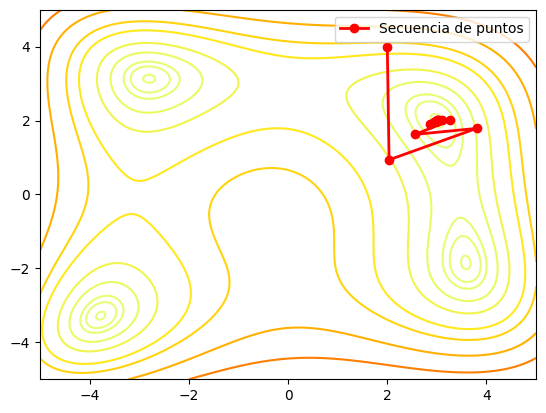

In [70]:
ffun = himmelblau
gfun = himmelblau_grad
xsearch = [-5,5]
ysearch = [-5,5]
x0 = np.array([2.0, 4.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600
xk, kiter, bl, rcrd = descmax_bt_exact(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

El numero de iteraciones del algoritmo de descenso fue de:  37
El punto optimo hallado fue:  [3.00000001 2.        ]
El valor de la funcion en el punto optimo hallado es:  2.823676151945246e-15
La norma del gradiente en el punto optimo hallado es de 6.816747434228448e-07
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.023434213890080643
El promedio de iteraciones del algoritmo de backtracking fue de:  2.526315789473684


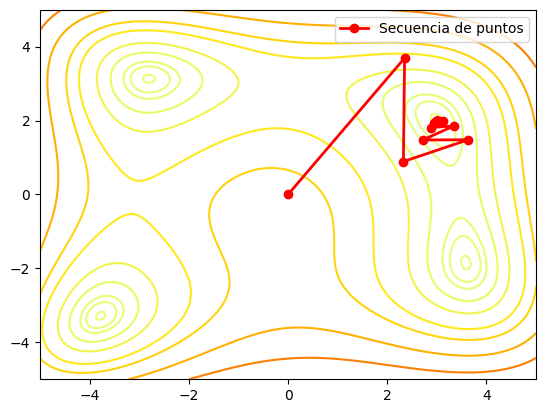

In [71]:
ffun = himmelblau
gfun = himmelblau_grad
xsearch = [-5,5]
ysearch = [-5,5]
x0 = np.array([0.0, 0.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600
xk, kiter, bl, rcrd = descmax_bt_exact(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

Funcion de Beale

El numero de iteraciones del algoritmo de descenso fue de:  1028
El punto optimo hallado fue:  [2.99999935 0.49999983]
El valor de la funcion en el punto optimo hallado es:  7.177708227617135e-14
La norma del gradiente en el punto optimo hallado es de 6.37517508891056e-07
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.04244873581954145
El promedio de iteraciones del algoritmo de backtracking fue de:  0.11564625850340136


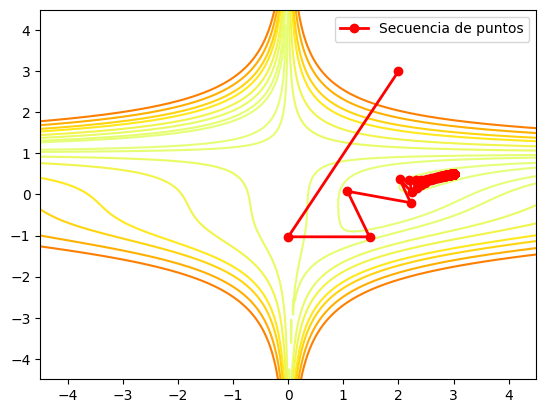

In [72]:
ffun = bale
gfun = bale_grad
xsearch = [-4.5,4.5]
ysearch = [-4.5,4.5]
x0 = np.array([2.0, 3.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600
xk, kiter, bl, rcrd = descmax_bt_exact(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

El numero de iteraciones del algoritmo de descenso fue de:  1797
El punto optimo hallado fue:  [3.00000073 0.50000019]
El valor de la funcion en el punto optimo hallado es:  8.765687729297037e-14
La norma del gradiente en el punto optimo hallado es de 4.7427864732855434e-07
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.03130671593562186
El promedio de iteraciones del algoritmo de backtracking fue de:  0.07007786429365963


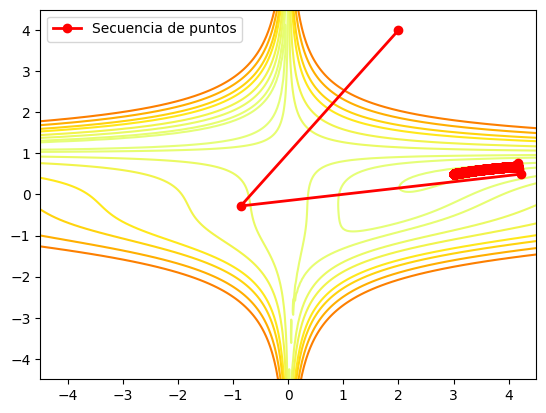

In [73]:
ffun = bale
gfun = bale_grad
xsearch = [-4.5,4.5]
ysearch = [-4.5,4.5]
x0 = np.array([2.0, 4.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600
xk, kiter, bl, rcrd = descmax_bt_exact(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

Funcion de Rosenbrock

El numero de iteraciones del algoritmo de descenso fue de:  16942
El punto optimo hallado fue:  [0.99999495 0.99998989]
El valor de la funcion en el punto optimo hallado es:  2.5537215746960312e-11
La norma del gradiente en el punto optimo hallado es de 9.300609259878548e-06
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.001807405064791999
El promedio de iteraciones del algoritmo de backtracking fue de:  0.005843121052942218


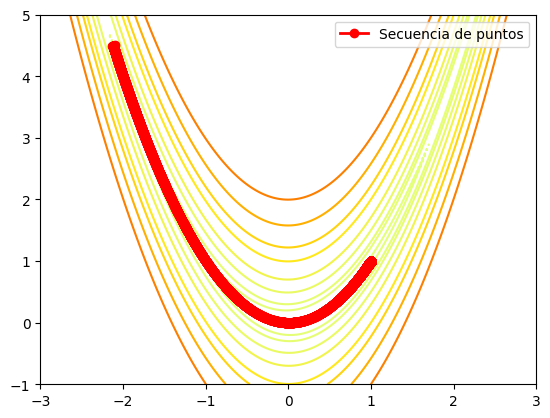

In [74]:
ffun = rosenbrock
gfun = rosenbrock_grad
xsearch = [-3,3]
ysearch = [-1,5]
x0 = np.array([-2.1, 4.5])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600
xk, kiter, bl, rcrd = descmax_bt_exact(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

El numero de iteraciones del algoritmo de descenso fue de:  13464
El punto optimo hallado fue:  [0.99999569 0.99999139]
El valor de la funcion en el punto optimo hallado es:  1.8573024113063803e-11
La norma del gradiente en el punto optimo hallado es de 1.2162427761699429e-05
El algoritmo termino con condicion de paro:  True
El valor promedio de los pasos fue:  0.0021307029527849785
El promedio de iteraciones del algoritmo de backtracking fue de:  0.00772372818418121


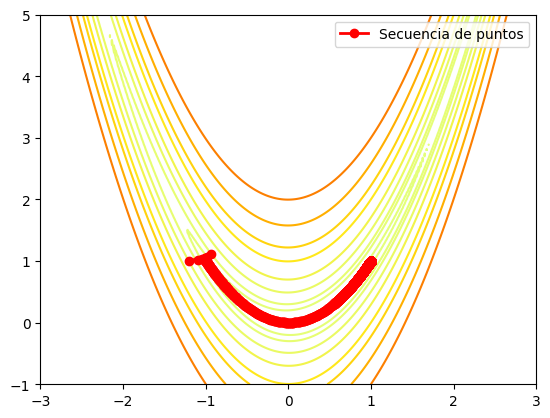

In [75]:
ffun = rosenbrock
gfun = rosenbrock_grad
xsearch = [-3,3]
ysearch = [-1,5]
x0 = np.array([-1.2, 1.0])
n = len(x0)
tau = np.sqrt(n*eps_m)
a0 = 1.0
rho = 0.8
c0 = 0.1
NMax = 30000
KMax = 600
xk, kiter, bl, rcrd = descmax_bt_exact(ffun, gfun, x0, tau, NMax, a0, rho, c0, KMax)
print("El numero de iteraciones del algoritmo de descenso fue de: ",kiter)
print("El punto optimo hallado fue: ",xk)
print("El valor de la funcion en el punto optimo hallado es: ", ffun(xk))
print("La norma del gradiente en el punto optimo hallado es de", np.linalg.norm(gfun(xk)))
print('El algoritmo termino con condicion de paro: ', bl)
print('El valor promedio de los pasos fue: ', np.mean(rcrd[:, 2]))
print('El promedio de iteraciones del algoritmo de backtracking fue de: ', np.mean(rcrd[:,-1:]))

contornosFnc2D(ffun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcrd[:,:2])

### 3.- Comentario
En el caso de la funcion de Himmelblau el numero de iteraciones del algoritmo de descenso aumento un poco del paso inexacto al exacto, sin embargo, hubo una mejora significativa en el promedio de iteraciones del algorimo de backtracking, respecto a las graficas es posible mencionar que tienen comportamientos similares.

En la funcion de Beale, mientras que para el primero de los puntos el numero de iteraciones para el algoritmo de descenso se mantuvo practicamente igual, en el caso del segundo punto, tuvo una mejora de un orden de magnitud. De la misma forma, en ambos casos la mejora en el promedio de iteraciones del algoritmo de backtracking es muy grande. Respecto a las graficas, mientras que para el primer caso podemos observar que el comportamiento es similar, el segundo se respalda lo anterior haciendose visible una mejora.

Por ultimo en la funcion de Rosenbrock, en el caso de las iteraciones del algoritmo de descenso se tiene una mejora sustancial para el primer punto, sin embargo, en el segundo punto aunque empeora, es relativamente poco. Para el promedio de iteraciones del algoritmo de backtracking la mejora es superior, mientras que las graficas para el caso de paso exacto se ve que tienen una convergencia lenta, y en el caso inexacto en el primer punto tambien tiene una convergencia lenta pero en el segundo caso se aprecia que se queda muy cerca de determinados puntos.

De forma general se puede hablar de que si existe una mejora con el paso exacto, sobre todo en el algoritmo de backtracking pues en general el promedio se mantiene muy bajo.

## Ejercicio 3


Sea $f(x) = f(x_1, x_2) = 5 + x_1^2 + x_2^2$. Si $\textbf{x}_0 = (-1, 1)^T$, $\textbf{p}_0 = (1, 0)^T$ y $c_1 = 10^{-4}$. Verifique que $\textbf{p}_0$ es una direccion de descenso y encuentre el valor mas grande $\alpha > 0$ que satisface la condicion de descenso suficiente.

Primero validamos que efectivamente $\textbf{p}_0$ sea una direccion de descenso. Sea $\nabla f(x) = (2 x_1, 2 x_2)$ el gradiente de la funcion entonces verificamos que $\nabla f(x) \cdot p_0 < 0$

$$
\nabla f(x_0) \cdot p_0 = -2 < 0
$$

Entonces en este caso es una direccion de descenso, ahora berificamos que sea suficiente tal que

$$
    f(x_0 + \alpha p_0) \leq f(x_0) + c_1 \alpha p_0^T \nabla f(x_0)
$$

$$
    f(x_0 + \alpha p_0) = \alpha^2 - 2 \alpha + 7  
$$

$$
    f(x_0) = 7
$$

$$
c_1 \alpha p_0^T \nabla f(x_0) = -\frac{2 \alpha}{10^4}
$$

$$
     \alpha^2 - 2 \alpha + 7  \leq 7 - \frac{2 \alpha}{10^4}
$$

$$
    \alpha (alpha - 2(1 - 10^{-4})) \leq 0
$$

dado que $\alpha >0$, entonces

$$
    alpha - 2(1 - 10^{-4}) \leq 0
$$
$$
    alpha \leq 2(1 - 10^{-4})
$$

por lo tanto el $\alpha$ maximo es
$$
    \alpha_{max} = 2(1 - 10^{-4})
$$

## Ejercicio 4

Sea $f:\mathbb{R}^n \to \mathbb{R}$ y $\textbf{S}$ una matriz no singular de tamanio $n \times n$. Si $\textbf{x} = \textbf{Sy}$ para $ \textbf{y} \in \mathbb{R}^n$ y definimos $g(\textbf{y}) = f(\textbf{Sy})$, aplicando la regla de la cadena muestre que
$$ \nabla g(\textbf{y}) = \textbf{S}^T \nabla f(\textbf{x})$$

Bien, para poder mostrar lo anterior entonces aplicamos lo siguiente
$$
    \frac{\partial g(\textbf{y})}{\partial \textbf{y}} = \frac{\partial f(\textbf{x})}{\partial \textbf{y}}
$$
$$
    \frac{\partial f(\textbf{x})}{\partial \textbf{y}} = \frac{\partial f(\textbf{x})}{\partial \textbf{x}} \frac{\partial \textbf{x}}{\partial y}
$$
Dado $\textbf{x} = \textbf{Sy}$, entonces

$$
    \frac{\partial g(\textbf{y})}{\partial \textbf{y}} = \textbf{S}^T \nabla f(\textbf{x})
$$

Entonces aplicando el metodo del maximo descenso a la funcion $g$ es:
$$
    y_{k+1} = y_k - \alpha_k \textbf{S}^T \nabla f(\textbf{Sy}_k)
$$
Multiplicando $\textbf{S}$ ambos miembros de la ecuacion y utilizando la notacion $\textbf{x}_x = \textbf{Sy}_k$:
$$
    \textbf{x}_{k+1} = \textbf{Sy}_k - \alpha_k \textbf{SS}^T \nabla f(\textbf{Sy}_k)
$$
Si $\textbf{D} = \textbf{SS}^T$, se obtiene el metodo del gradiente escalado:
$$
    \textbf{x}_{k+1} = \textbf{x}_k - \alpha_k \textbf{D} \nabla f(\textbf{x}_k)
$$
Muestre que $- \textbf{D} \nabla f(\textbf{x}_k)$ es una direccion de descenso.

Bien entonces debemos verificar que el producto escalar entre el gradiente de la funcion y la direccion sea negativo para verificar que este sea una direccion de descenso, entonces
$$
    - \textbf{D} \nabla f(\textbf{x}_k) \cdot \nabla f(\textbf{x}_k) < 0
$$

Entonces, esto se reescribe tal que
$$
    - \textbf{D} || \nabla f(\textbf{x}) ||^2
$$
Derivado del hecho de que $\textbf{S}$ es una matriz no singular, entonces se tiene que $\textbf{D} = \textbf{SS}^T$ es una matriz simetrica definida positiva, por ende, este valor cumple con ser una direccion de descenso.